In [1]:
import pandas as pd
dir_path =r"C:/Users/User/Desktop/msp22059 C-07_FINAL/msp22059 C-07/2_CSI300_1.5/datasets/"
df=pd.read_csv(dir_path+'(raw)Quarterly_data_1.5.csv')

In [2]:
df.head()

,quarter,future_return,volume,inventory,amount,BASIS,RSI,short_balance_ratio,spread,pli,index_trading_volume,index_turnover_rate,CCt
0,1,NaN,16.330141,13.675352,11.568298,25.292400,43.813538,0.000081,1.791637,0.360000,10.345883,0.445200,1.0
1,2,-0.021297,16.749515,14.487159,11.975821,6.743270,49.711198,0.000116,1.419721,0.603175,10.690867,0.521429,0.0
2,3,0.151496,16.503935,14.540578,11.892310,35.787000,52.878266,0.000079,1.481516,0.508197,11.336654,0.748689,0.0
3,4,-0.035664,16.282721,14.541778,11.629259,9.604879,47.325634,0.000265,1.198595,0.551724,10.978013,0.507931,0.0
4,5,-0.020328,16.138946,14.680744,11.466374,4.527033,45.282475,0.001061,0.949640,0.491803,10.672704,0.375902,0.0


In [3]:
#normalize data
cols_to_norm = ['future_return','volume','amount','BASIS','index_turnover_rate','short_balance_ratio','pli','spread','RSI','index_trading_volume','inventory']
df[cols_to_norm] = df[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df.head()

,quarter,future_return,volume,inventory,amount,BASIS,RSI,short_balance_ratio,spread,pli,index_trading_volume,index_turnover_rate,CCt
0,1,NaN,0.561270,0.000000,0.493418,0.931309,0.324385,0.000008,1.000000,0.000000,0.086958,0.124093,1.0
1,2,0.470264,0.645924,0.297046,0.570356,0.809897,0.529036,0.000208,0.765367,0.910362,0.210244,0.169145,0.0
2,3,0.778756,0.596352,0.316592,0.554589,1.000000,0.638935,0.000000,0.804352,0.554797,0.441028,0.303457,0.0
3,4,0.444614,0.551698,0.317031,0.504927,0.828627,0.446256,0.001061,0.625864,0.717749,0.312861,0.161168,0.0
4,5,0.471993,0.522676,0.367880,0.474176,0.795391,0.375358,0.005590,0.468804,0.493426,0.203753,0.083137,0.0


In [4]:
#use SVM
from sklearn import svm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [5]:
#drop NaN
df = df.dropna()
#drop week column
df = df.drop(['quarter'], axis=1)

In [6]:
from imblearn.over_sampling import SMOTE
X = df.iloc[:, :-1]  # Features (all columns except the last one)
y = df.iloc[:, -1]   # Labels (last column)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
balanced_df = pd.concat([X_resampled, y_resampled], axis=1)

In [7]:
balanced_df

,future_return,volume,inventory,amount,BASIS,RSI,short_balance_ratio,spread,pli,index_trading_volume,index_turnover_rate,CCt
0,0.470264,0.645924,0.297046,0.570356,0.809897,0.529036,0.000208,0.765367,0.910362,0.210244,0.169145,0.0
1,0.778756,0.596352,0.316592,0.554589,1.000000,0.638935,0.000000,0.804352,0.554797,0.441028,0.303457,0.0
2,0.444614,0.551698,0.317031,0.504927,0.828627,0.446256,0.001061,0.625864,0.717749,0.312861,0.161168,0.0
3,0.471993,0.522676,0.367880,0.474176,0.795391,0.375358,0.005590,0.468804,0.493426,0.203753,0.083137,0.0
4,0.370213,0.571028,0.372259,0.503403,0.780359,0.381434,0.010618,0.144450,0.207341,0.124871,0.033278,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
69,0.517462,0.453245,0.831522,0.454156,0.693553,0.317375,0.119793,0.478021,0.510915,0.632933,0.207600,1.0
70,0.401862,0.271999,0.551253,0.242053,0.768279,0.505806,0.146359,0.436921,0.211975,0.302364,0.051899,1.0
71,0.404061,0.481519,0.372398,0.432642,0.765349,0.308350,0.020421,0.151912,0.359216,0.202568,0.060704,1.0
72,0.474155,0.561487,0.807092,0.520576,0.704141,0.371636,0.090231,0.511720,0.445466,0.480692,0.162761,1.0


In [8]:
X = balanced_df.iloc[:, :-1]  # Features (all columns except the last one)
y = balanced_df.iloc[:, -1]   # Labels (last column)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
#fit SVM model
clf = svm.SVC(kernel='linear', C=0.1, random_state=42).fit(X_train, y_train)
y_pred = clf.predict(X_test)


In [10]:
#accuracy
print("Accuracy:",accuracy_score(y_test, y_pred))
#confusion matrix
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))
#classification report
print("Classification Report:\n",classification_report(y_test, y_pred))

Accuracy: 0.5333333333333333
Confusion Matrix:
 [[1 7]
 [0 7]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.12      0.22         8
         1.0       0.50      1.00      0.67         7

    accuracy                           0.53        15
   macro avg       0.75      0.56      0.44        15
weighted avg       0.77      0.53      0.43        15



In [11]:
#print prediction result and comapre with y_test
print("Prediction:\n",y_pred)
print("Actual:\n",np.array(y_test))


Prediction:
 [1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Actual:
 [1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1.]


Feature: future_return, Score: -0.48651
Feature: volume, Score: -0.08298
Feature: inventory, Score: -0.12247
Feature: amount, Score: -0.07140
Feature: BASIS, Score: -0.06628
Feature: RSI, Score: -0.52236
Feature: short_balance_ratio, Score: -0.02952
Feature: spread, Score: 0.10925
Feature: pli, Score: -0.74098
Feature: index_trading_volume, Score: -0.03172
Feature: index_turnover_rate, Score: -0.11440


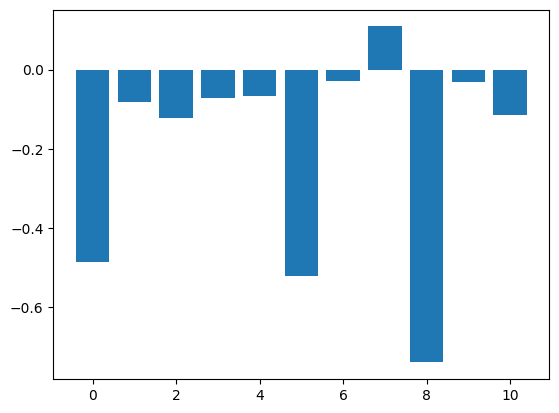

In [12]:
from matplotlib import pyplot 
importance = clf.coef_[0]
# summarize feature importance
feature_names = X.columns
for i,v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (feature_names[i],v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()